# MMDM Lab Work 1

## Problem 1 (a) 
## Use genetic algorithm to find global extremum of given functions

Parameters of the best solution:  [-0.00823889  1.58217432]
Fitness value of the best solution =  8.10619400330237


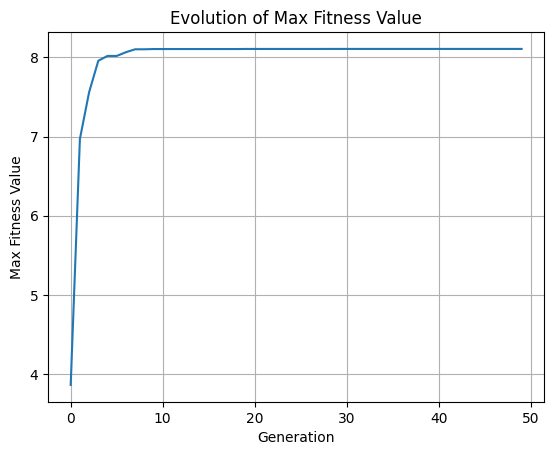

CPU times: total: 328 ms
Wall time: 2.68 s


In [1]:
%%time
import numpy as np
import math
import matplotlib.pyplot as plt


# Fitness function
def fitness_func(solution):
    x = solution[0]
    y = solution[1]
    z = (3*(1-x)**2 * math.exp(-x**2-(y+1)**2)-10*(x/5-x**3-y**5)*math.exp(-x**2 - y**2)-1/3*math.exp(-(x+1)**2-y**2))
    if cond_extr == "min": 
        z = z * -1
    return z

# Selecting parents
def select_parents(population, fitness_values, num_parents):
    parents = np.empty((num_parents, population.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.argmax(fitness_values)
        parents[parent_num, :] = population[max_fitness_idx, :]
        fitness_values[max_fitness_idx] = -np.inf
    return parents

# Crossover
def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.random.randint(low=0, high=parents.shape[1])
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k+1) % parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

# Mutation
def mutation(offspring_crossover):
    for idx in range(offspring_crossover.shape[0]):
        mutation_indexes = np.random.randint(low=0, high=offspring_crossover.shape[1], size=1)
        random_value = np.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, mutation_indexes] = offspring_crossover[idx, mutation_indexes] + random_value
    return offspring_crossover

# Genetic algorithm constants
num_generations = 50
num_parents_mating = 100
sol_per_pop = 300
num_genes = 2 
gene_space = {"low": -10, "high": 10}  
cond_extr = "max"

new_population = np.random.uniform(gene_space["low"], gene_space["high"], (sol_per_pop, num_genes))

fitness_values_per_generation = []


for generation in range(num_generations):
    fitness_values = np.apply_along_axis(fitness_func, 1, new_population)
    fitness_values_per_generation.append(np.max(fitness_values))  
    parents = select_parents(new_population, fitness_values, num_parents_mating)
    offspring_crossover = crossover(parents, offspring_size=(sol_per_pop - parents.shape[0], num_genes))
    offspring_mutation = mutation(offspring_crossover)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation



fitness_values = np.apply_along_axis(fitness_func, 1, new_population)
best_solution_idx = np.argmax(fitness_values)
best_solution = new_population[best_solution_idx, :]
best_fitness = fitness_func(best_solution)

if cond_extr == "min":
    best_solution = best_solution * -1
    best_fitness = best_fitness * -1
    fitness_values_per_generation = list(map(lambda x: -x,fitness_values_per_generation))
    

print("Parameters of the best solution: ", best_solution)
print("Fitness value of the best solution = ", best_fitness)


plt.plot(range(num_generations), fitness_values_per_generation)
plt.xlabel('Generation')
plt.ylabel('Max Fitness Value')
plt.title('Evolution of Max Fitness Value')
plt.grid(True)
plt.show()


Lets test algorithm for 3 dimensions

Parameters of the best solution:  [  0.51793047   1.69359675 -31.65305281]
Fitness value of the best solution =  1007.9812711489011


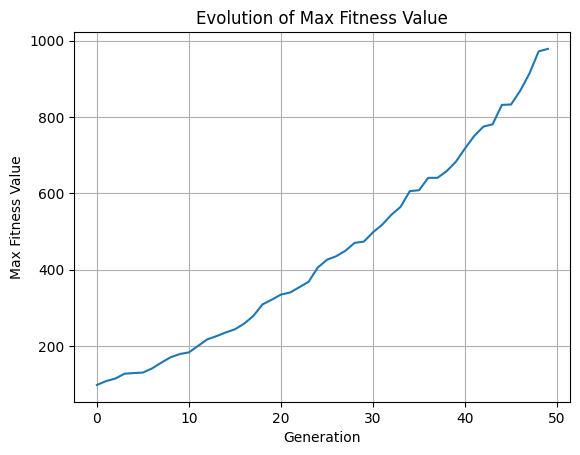

CPU times: total: 188 ms
Wall time: 420 ms


In [2]:
%%time
import numpy as np
import math
import matplotlib.pyplot as plt


# Fitness function
def fitness_func(solution):
    x = solution[0]
    y = solution[1]
    m = solution[2]
    z = (3*(1-x)**2 * math.exp(-x**2-(y+1)**2)-10*(x/5-x**3-y**5)*math.exp(-x**2 - y**2)-1/3*math.exp(-(x+1)**2-y**2) + m**2)
    if cond_extr == "min": 
        z = z * -1
    return z

# Selecting parents
def select_parents(population, fitness_values, num_parents):
    parents = np.empty((num_parents, population.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.argmax(fitness_values)
        parents[parent_num, :] = population[max_fitness_idx, :]
        fitness_values[max_fitness_idx] = -np.inf
    return parents

# Crossover
def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.random.randint(low=0, high=parents.shape[1])
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k+1) % parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

# Mutation
def mutation(offspring_crossover):
    for idx in range(offspring_crossover.shape[0]):
        mutation_indexes = np.random.randint(low=0, high=offspring_crossover.shape[1], size=1)
        random_value = np.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, mutation_indexes] = offspring_crossover[idx, mutation_indexes] + random_value
    return offspring_crossover

# Genetic algorithm constants
num_generations = 50
num_parents_mating = 100
sol_per_pop = 300
num_genes = 3 
gene_space = {"low": -10, "high": 10}  
cond_extr = "max"

new_population = np.random.uniform(gene_space["low"], gene_space["high"], (sol_per_pop, num_genes))

fitness_values_per_generation = []


for generation in range(num_generations):
    fitness_values = np.apply_along_axis(fitness_func, 1, new_population)
    fitness_values_per_generation.append(np.max(fitness_values))  
    parents = select_parents(new_population, fitness_values, num_parents_mating)
    offspring_crossover = crossover(parents, offspring_size=(sol_per_pop - parents.shape[0], num_genes))
    offspring_mutation = mutation(offspring_crossover)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation



fitness_values = np.apply_along_axis(fitness_func, 1, new_population)
best_solution_idx = np.argmax(fitness_values)
best_solution = new_population[best_solution_idx, :]
best_fitness = fitness_func(best_solution)

if cond_extr == "min":
    best_solution = best_solution * -1
    best_fitness = best_fitness * -1
    fitness_values_per_generation = list(map(lambda x: -x,fitness_values_per_generation))
    

print("Parameters of the best solution: ", best_solution)
print("Fitness value of the best solution = ", best_fitness)


plt.plot(range(num_generations), fitness_values_per_generation)
plt.xlabel('Generation')
plt.ylabel('Max Fitness Value')
plt.title('Evolution of Max Fitness Value')
plt.grid(True)
plt.show()


## Problem 1 (b)

Parameters of the best solution:  [-1.34938889  1.34953989]
Fitness value of the best solution =  -2.0626118686680823


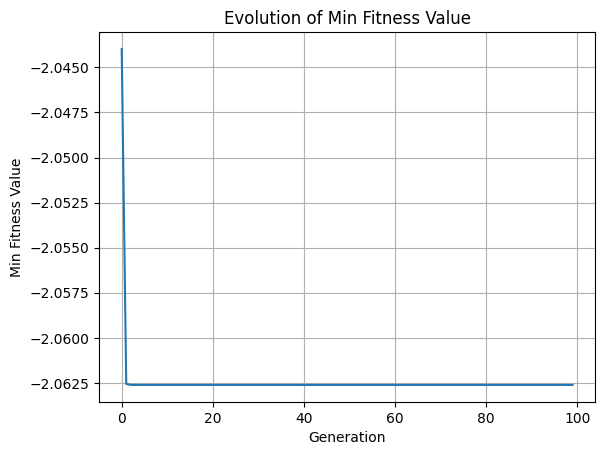

CPU times: total: 938 ms
Wall time: 2.66 s


In [3]:
%%time
import numpy as np
import math
import matplotlib.pyplot as plt


is_min = True

# Fitness function
def fitness_func(solution):
    x = solution[0]
    y = solution[1]
    exp = (-0.0001*(np.abs(math.sin(x)*math.sin(y)*math.exp(np.abs(100- (math.sqrt(x**2 + y**2)/math.pi)))) + 1)**0.1)
    z = (-1)**int(is_min)*exp
    return z

# Selecting parents
def select_parents(population, fitness_values, num_parents):
    parents = np.empty((num_parents, population.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.argmax(fitness_values)
        parents[parent_num, :] = population[max_fitness_idx, :]
        fitness_values[max_fitness_idx] = -np.inf
    return parents

# Crossover
def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.random.randint(low=0, high=parents.shape[1])
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k+1) % parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

# Mutation
def mutation(offspring_crossover):
    for idx in range(offspring_crossover.shape[0]):
        mutation_indexes = np.random.randint(low=0, high=offspring_crossover.shape[1], size=1)
        random_value = np.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, mutation_indexes] = offspring_crossover[idx, mutation_indexes] + random_value
    return offspring_crossover

# Genetic algorithm constants

num_generations = 100
num_parents_mating = 30
sol_per_pop = 1000
num_genes = 2  
gene_space = {"low": -10, "high": 10}  


new_population = np.random.uniform(gene_space["low"], gene_space["high"], (sol_per_pop, num_genes))


fitness_values_per_generation = []


for generation in range(num_generations):
    fitness_values = np.apply_along_axis(fitness_func, 1, new_population)
    fitness_values_per_generation.append(np.max(fitness_values)) 
    parents = select_parents(new_population, fitness_values, num_parents_mating)
    offspring_crossover = crossover(parents, offspring_size=(sol_per_pop - parents.shape[0], num_genes))
    offspring_mutation = mutation(offspring_crossover)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation


fitness_values = np.apply_along_axis(fitness_func, 1, new_population)
best_solution_idx = np.argmax(fitness_values)
best_solution = new_population[best_solution_idx, :]
best_fitness = fitness_func(best_solution)


print("Parameters of the best solution: ", (-1)**int(is_min)*best_solution)
print("Fitness value of the best solution = ", (-1)**int(is_min)*best_fitness)


plt.plot(range(num_generations), list(map(lambda x: (-1)**int(is_min)*x, fitness_values_per_generation)))
plt.xlabel('Generation')
plt.ylabel('Min Fitness Value')
plt.title('Evolution of Min Fitness Value')
plt.grid(True)
plt.show()

## Problem 2  
## Find pareto front for the given multi-objective optimisation problem using NSGA II algorithm.

NSGA-II multi-objective optimization algorithm

In [4]:
import numpy as np
from copy import deepcopy
from itertools import chain
import math

class NSGA2:

    def __init__(self, max_iter = 100, pop_size = 100, p_crossover = 0.7, alpha = 0, p_mutation = 0.2, mu = 0.02, verbose = True):
        """Constructor for the NSGA-II object"""
        self.max_iter = max_iter
        self.pop_size = pop_size
        self.p_crossover = p_crossover
        self.alpha = alpha
        self.p_mutation = p_mutation
        self.mu = mu
        self.verbose = verbose

    def run(self, problem):
        """Runs the NSGA-II algorithm on a given problem."""
        
        # Extract Problem Info
        cost_function = problem['cost_function']
        n_var = problem['n_var']
        var_size = (n_var,) #np.array([1, n_var])
        var_min = problem['var_min']
        var_max = problem['var_max']

        # Number of offsprings/parents (multiple of 2)
        n_crossover = 2*int(self.p_crossover * self.pop_size / 2)

        # Number of Mutatnts
        n_mutation = int(self.p_mutation * self.pop_size)

        # Mutation Step Size
        sigma = 0.1 * (var_max - var_min)

        # Empty Individual
        empty_individual = {
            'position': None,
            'cost': None,
            'rank': None,
            'crowding_distance': None,
        }

        # Initialize Population
        pop = [deepcopy(empty_individual) for _ in range(self.pop_size)]
        for i in range(self.pop_size):
            pop[i]['position'] = np.random.uniform(var_min, var_max, var_size)
            pop[i]['cost'] = cost_function(pop[i]['position'])

        # Non-dominated Sorting
        pop, F = self.non_dominated_sorting(pop)

        # Calculate Crowding Distance
        pop = self.calc_crowding_distance(pop, F)

        # Sort Population
        pop, F = self.sort_population(pop)

        # Main Loop
        for it in range(self.max_iter):
            
            # Crossover
            popc = [[deepcopy(empty_individual), deepcopy(empty_individual)] for _ in range(n_crossover//2)]
            for k in range(n_crossover//2):
                parents = np.random.choice(range(self.pop_size), size = 2, replace = False)
                p1 = pop[parents[0]]
                p2 = pop[parents[1]]
                popc[k][0]['position'], popc[k][1]['position'] = self.crossover(p1['position'], p2['position'])
                popc[k][0]['cost'] = cost_function(popc[k][0]['position'])
                popc[k][1]['cost'] = cost_function(popc[k][1]['position'])
                
            # Flatten Offsprings List
            popc = list(chain(*popc))
            
            # Mutation
            popm = [deepcopy(empty_individual) for _ in range(n_mutation)]
            for k in range(n_mutation):
                p = pop[np.random.randint(self.pop_size)]
                popm[k]['position'] = self.mutate(p['position'], sigma)
                popm[k]['cost'] = cost_function(popm[k]['position'])

            # Create Merged Population
            pop = pop + popc + popm

            # Non-dominated Sorting
            pop, F = self.non_dominated_sorting(pop)

            # Calculate Crowding Distance
            pop = self.calc_crowding_distance(pop, F)

            # Sort Population
            pop, F = self.sort_population(pop)

            # Truncate Extra Members
            pop, F = self.truncate_population(pop, F)

            # Show Iteration Information
            if self.verbose:
                print(f'Iteration {it + 1}: Number of Pareto Members = {len(F[0])}')

        # Pareto Front Population
        pareto_pop = [pop[i] for i in F[0]]
        
        return {
            'pop': pop,
            'F': F,
            'pareto_pop': pareto_pop,
        }
        
    def dominates(self, p, q):
        """Checks if p dominates q"""
        return all(p['cost'] <= q['cost']) and any(p['cost'] < q['cost'])

    def non_dominated_sorting(self, pop):
        """Perform Non-dominated Sorting on a Population"""
        pop_size = len(pop)

        # Initialize Domination Stats
        domination_set = [[] for _ in range(pop_size)]
        dominated_count = [0 for _ in range(pop_size)]

        # Initialize Pareto Fronts
        F = [[]]

        # Find the first Pareto Front
        for i in range(pop_size):
            for j in range(i+1, pop_size):
                # Check if i dominates j
                if self.dominates(pop[i], pop[j]):
                    domination_set[i].append(j)
                    dominated_count[j] += 1
                
                # Check if j dominates i
                elif self.dominates(pop[j], pop[i]):
                    domination_set[j].append(i)
                    dominated_count[i] += 1

            # If i is not dominated at all
            if dominated_count[i] == 0:
                pop[i]['rank'] = 0
                F[0].append(i)

        # Pareto Counter
        k = 0

        while True:
            
            # Initialize the next Pareto front
            Q = []
            
            # Find the members of the next Pareto front
            for i in F[k]:
                for j in domination_set[i]:
                    dominated_count[j] -= 1
                    if dominated_count[j] == 0:
                        pop[j]['rank'] = k + 1
                        Q.append(j)
            
            # Check if the next Pareto front is empty
            if not Q:
                break
            
            # Append the next Pareto front
            F.append(Q)

            # Increment the Pareto counter
            k += 1

        return pop, F

    def calc_crowding_distance(self, pop, F):
        """Calculate the crowding distance for a given population"""

        # Number of Pareto fronts (ranks)
        parto_count = len(F)
        
        # Number of Objective Functions
        n_obj = len(pop[0]['cost'])

        # Iterate over Pareto fronts
        for k in range(parto_count):
            costs = np.array([pop[i]['cost'] for i in F[k]])
            n = len(F[k])
            d = np.zeros((n, n_obj))

            # Iterate over objectives
            for j in range(n_obj):
                idx = np.argsort(costs[:, j])
                d[idx[0], j] = np.inf
                d[idx[-1], j] = np.inf

                for i in range(1, n-1):
                    d[idx[i], j] = costs[idx[i+1], j] - costs[idx[i-1], j]
                    d[idx[i], j] /= costs[idx[-1], j] - costs[idx[0], j]

            # Calculate Crowding Distance
            for i in range(n):
                pop[F[k][i]]['crowding_distance'] = sum(d[i, :])

        return pop
    
    def sort_population(self, pop):
        """Sorts a population based on rank (in asceding order) and crowding distance (in descending order)"""
        pop = sorted(pop, key = lambda x: (x['rank'], -x['crowding_distance']))

        max_rank = pop[-1]['rank']
        F = []
        for r in range(max_rank + 1):
            F.append([i for i in range(len(pop)) if pop[i]['rank'] == r])

        return pop, F
    
    def truncate_population(self, pop, F, pop_size = None):
        """Truncates a population to a given size"""

        if pop_size is None:
            pop_size = self.pop_size

        if len(pop) <= pop_size:
            return pop, F

        # Truncate the population
        pop = pop[:pop_size]

        # Remove the extra members from the Pareto fronts
        for k in range(len(F)):
            F[k] = [i for i in F[k] if i < pop_size]

        return pop, F

    def crossover(self, x1, x2):
        """Performs crossover between two parents"""
        r_min = -self.alpha
        r_max = 1 + self.alpha
        r = np.random.uniform(r_min, r_max, x1.shape)
        y1 = r*x1 + (1-r)*x2
        y2 = r*x2 + (1-r)*x1
        return y1, y2
    
    def mutate(self, x, sigma):
        """Performs mutation on an individual"""
        n_var = x.size
        n_mu = np.ceil(self.mu*n_var)
        y = x.copy()
        
        J = np.random.choice(range(n_var), int(n_mu), replace=False)
        for j in J:
            y[j] += sigma*np.random.randn()
        
        return y
    

Finding pareto front

Iteration 1: Number of Pareto Members = 5
Iteration 2: Number of Pareto Members = 8
Iteration 3: Number of Pareto Members = 7
Iteration 4: Number of Pareto Members = 12
Iteration 5: Number of Pareto Members = 13
Iteration 6: Number of Pareto Members = 29
Iteration 7: Number of Pareto Members = 33
Iteration 8: Number of Pareto Members = 45
Iteration 9: Number of Pareto Members = 62
Iteration 10: Number of Pareto Members = 86
Iteration 11: Number of Pareto Members = 100
Iteration 12: Number of Pareto Members = 100
Iteration 13: Number of Pareto Members = 100
Iteration 14: Number of Pareto Members = 100
Iteration 15: Number of Pareto Members = 100
Iteration 16: Number of Pareto Members = 100
Iteration 17: Number of Pareto Members = 100
Iteration 18: Number of Pareto Members = 100
Iteration 19: Number of Pareto Members = 100
Iteration 20: Number of Pareto Members = 100
Iteration 21: Number of Pareto Members = 100
Iteration 22: Number of Pareto Members = 100
Iteration 23: Number of Pareto M

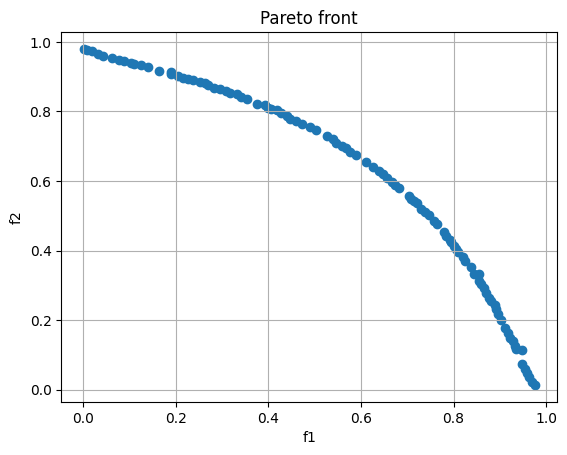

CPU times: total: 594 ms
Wall time: 2.01 s


In [5]:
%%time
def MOP2(x):
    s1 = 0
    s2 = 0
    for i in range(len(x)):
        s1 += (x[i] - (1 / math.sqrt(len(x)))) ** 2
        s2 += (x[i] + (1 / math.sqrt(len(x)))) ** 2
    
    f1 = 1 - math.exp(-1 * s1)
    f2 = 1 - math.exp(-1 * s2)
    return np.array([f1, f2])



# Problem Definition
problem = {
    'cost_function': MOP2,
    'n_var': 3,
    'var_min': -4,
    'var_max': 4,
}

# Initialize Algorithm
alg = NSGA2(
    max_iter = 50,
    pop_size = 100,
    p_crossover = 0.7,
    alpha = 0.1,
    p_mutation = 0.3,
    mu = 0.05,
    verbose = True,
)

# Solve the Problem
results = alg.run(problem)
pop = results['pop']
F = results['F']

# Plot Results
pf_costs = np.array([pop[i]['cost'] for i in F[0]])
plt.scatter(pf_costs[:,0], pf_costs[:,1])
plt.grid()
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Pareto front')
plt.show()


## Problem 3 (1)

Due to the upcoming holiday (8th of March), flower market decided to optimize its delivery (=
minimize delivery costs). At the begging of the day couriers pick up flowers from the flower market
and deliver them to clients. Each client needs only certain number of flowers and each courier can
carry only certain number of flowers. Couriers are paid for the distance travelled.

Mathematical model in attached file

In this case SALARY_PER_KM = 100 (max grade 8)

Generation 500: Costs = 6323.999999999999
Courier route 1: [0, 12, 15, 3, 4, 1, 7, 0] (Flowers: [200, 800, 200, 400, 100, 800], Total capacity: 2500)
Courier route 2: [0, 6, 2, 10, 16, 14, 9, 0] (Flowers: [400, 100, 200, 800, 400, 100], Total capacity: 2000)
Courier route 3: [0, 5, 8, 0] (Flowers: [200, 800], Total capacity: 1000)
Courier route 4: [0, 13, 11, 0] (Flowers: [400, 100], Total capacity: 500)
Total flowers transported: 6000


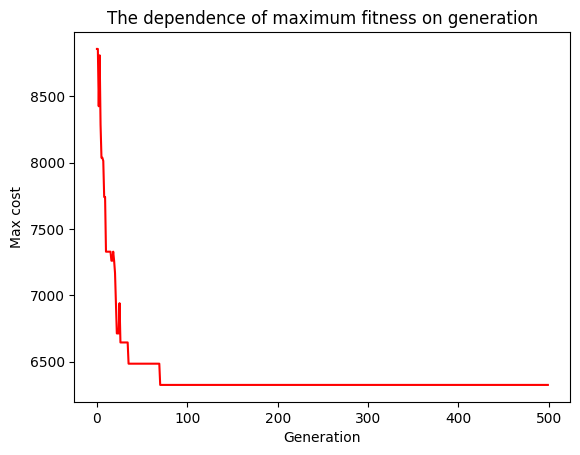

CPU times: total: 3.53 s
Wall time: 9.13 s


In [6]:
%%time
import random
distance_matrix = [
    [0, 5.48, 7.76, 6.96, 5.82, 2.74, 5.02, 1.94, 3.08, 1.94, 5.36, 5.02, 3.88, 3.54, 4.68, 7.76, 6.62],
    [5.48, 0, 6.84, 3.08, 1.94, 5.02, 7.30, 3.54, 6.96, 7.42, 10.84, 5.94, 4.80, 6.74, 10.16, 8.68, 12.10],
    [7.76, 6.84, 0, 9.92, 8.78, 5.02, 2.74, 8.10, 4.68, 7.42, 4.00, 12.78, 11.64, 11.30, 7.88, 15.52, 7.54],
    [6.96, 3.08, 9.92, 0, 1.14, 6.50, 8.78, 5.02, 8.44, 8.90, 12.32, 5.14, 6.28, 8.22, 11.64, 5.60, 13.58],
    [5.82, 1.94, 8.78, 1.14, 0, 5.36, 7.64, 3.88, 7.30, 7.76, 11.18, 4.00, 5.14, 7.08, 10.50, 6.74, 12.44],
    [2.74, 5.02, 5.02, 6.50, 5.36, 0, 2.28, 3.08, 1.94, 2.40, 5.82, 7.76, 6.62, 6.28, 5.14, 10.50, 7.08],
    [5.02, 7.30, 2.74, 8.78, 7.64, 2.28, 0, 5.36, 1.94, 4.68, 3.54, 10.04, 8.90, 8.56, 5.14, 12.78, 4.80],
    [1.94, 3.54, 8.10, 5.02, 3.88, 3.08, 5.36, 0, 3.42, 3.88, 7.30, 4.68, 3.54, 3.20, 6.62, 7.42, 8.56],
    [3.08, 6.96, 4.68, 8.44, 7.30, 1.94, 1.94, 3.42, 0, 2.74, 3.88, 8.10, 6.96, 6.62, 3.20, 10.84, 5.14],
    [1.94, 7.42, 7.42, 8.90, 7.76, 2.40, 4.68, 3.88, 2.74, 0, 3.42, 5.36, 4.22, 3.88, 2.74, 8.10, 4.68],
    [5.36, 10.84, 4.00, 12.32, 11.18, 5.82, 3.54, 7.30, 3.88, 3.42, 0, 8.78, 7.64, 7.30, 3.88, 11.52, 3.54],
    [5.02, 5.94, 12.78, 5.14, 4.00, 7.76, 10.04, 4.68, 8.10, 5.36, 8.78, 0, 1.14, 3.08, 6.50, 2.74, 8.44],
    [3.88, 4.80, 11.64, 6.28, 5.14, 6.62, 8.90, 3.54, 6.96, 4.22, 7.64, 1.14, 0, 1.94, 5.36, 3.88, 7.30],
    [3.54, 6.74, 11.30, 8.22, 7.08, 6.28, 8.56, 3.20, 6.62, 3.88, 7.30, 3.08, 1.94, 0, 3.42, 4.22, 5.36],
    [4.68, 10.16, 7.88, 11.64, 10.50, 5.14, 5.14, 6.62, 3.20, 2.74, 3.88, 6.50, 5.36, 3.42, 0, 7.64, 1.94],
    [7.76, 8.68, 15.52, 5.60, 6.74, 10.50, 12.78, 7.42, 10.84, 8.10, 11.52, 2.74, 3.88, 4.22, 7.64, 0, 7.98],
    [6.62, 12.10, 7.54, 13.58, 12.44, 7.08, 4.80, 8.56, 5.14, 4.68, 3.54, 8.44, 7.30, 5.36, 1.94, 7.98, 0]
]  # (in km)
flower_market_id = 0
demands = [0, 100, 100, 200, 400, 200, 400, 800, 800, 100, 200, 100, 200, 400, 400, 800, 800]

# Constants for the problem
NUM_COURIERS = 4
NUM_CLIENTS = 16
MAX_LOADS = [2500, 2000, 1000, 500]
SALARY_PER_KM = 100
# Maximum number of possible cities (including the market)
NUM_CITIES = NUM_CLIENTS + 1

# Maximum distance between cities
MAX_DISTANCE = max(max(row) for row in distance_matrix)

# Genetic algorithm constants
POPULATION_SIZE = 500  # Population size
P_CROSSOVER = 0.6  # Crossover probability
P_MUTATION = 0.1  # Mutation probability of an individual
MAX_GENERATIONS = 500  # Generations size
random.seed(10)

class FitnessMax():
    def __init__(self):
        self.values = [0]


class Individual():
    def __init__(self):
        self.courier_routes = [[] for _ in range(NUM_COURIERS)]  # List of routes for each courier
        self.fitness = FitnessMax()
        self.used_clients = set()

    def is_valid(self):
        # Checking that the load capacity is not exceeded for each courier
        for i, route in enumerate(self.courier_routes):
            if sum(demands[client] for client in route) > MAX_LOADS[i]:
                return False

        # Checking that all flowers have been distributed
        all_flowers_distributed = set(range(1, NUM_CLIENTS + 1)).issubset(self.used_clients)

        return all_flowers_distributed

    def calculate_load(self, route):
        # Calculating the total load for the given route
        return sum(demands[client] for client in route)

    def random_init(self):
        # Random distribution of clients among couriers
        client_indices = list(range(1, NUM_CLIENTS + 1))
        random.shuffle(client_indices)
        self.courier_routes = [[] for _ in range(NUM_COURIERS)]
        self.used_clients = set()

        for i in range(NUM_CLIENTS):
            client_index = client_indices[i]
            assigned = False
            for j in range(NUM_COURIERS):
                if (sum(demands[client] for client in self.courier_routes[j]) + demands[client_index] <= MAX_LOADS[j] and client_index not in self.used_clients):
                    self.courier_routes[j].append(client_index)
                    self.used_clients.add(client_index)
                    assigned = True
                    break
            if not assigned:
                self.courier_routes[random.randint(0, NUM_COURIERS - 1)].append(client_index)
    # Calculation of total costs
    def evaluate(self):
        total_distance = 0
        for courier_index, route in enumerate(self.courier_routes):
            if len(route) == 0:
                continue
            total_distance += distance_matrix[0][route[0]]  # Distance from the market to the first client
            for i in range(len(route) - 1):
                total_distance += distance_matrix[route[i]][route[i + 1]]  # Distance between clients
            total_distance += distance_matrix[route[-1]][0]  # Distance from the last client to the market
        return total_distance * SALARY_PER_KM



def clone(individual):
    new_individual = Individual()
    new_individual.courier_routes = [route[:] for route in individual.courier_routes]
    new_individual.fitness.values = individual.fitness.values
    return new_individual

#Tournament selection
def selTournament(population, p_len):
    selected = []
    for _ in range(p_len):
        tournament = random.sample(population, 3)
        selected.append(max(tournament, key=lambda ind: ind.fitness.values[0]))
    return selected


def fitness(individual):
    return -individual.evaluate(),


def individualCreator():
    ind = Individual()
    ind.random_init()
    return ind


def populationCreator(n=0):
    population = []
    for _ in range(n):
        ind = Individual()
        ind.random_init()
        # Проверяем, что индивидуум является допустимым
        while not ind.is_valid():
            ind.random_init()  # Если не допустим, создаем новый
        population.append(ind)
    return population

# Crossover
def crossover(parent1, parent2):
    child1 = clone(parent1)

    # Child inherits one random route from one parent and another random route from the second parent
    while (True):
        courier_index_1 = random.randint(0, NUM_COURIERS - 1)
        courier_index_2 = random.randint(0, NUM_COURIERS - 1)
        if courier_index_1 != courier_index_2:
            break
    child1.courier_routes[courier_index_1] = parent1.courier_routes[courier_index_1]
    child1.courier_routes[courier_index_2] = parent2.courier_routes[courier_index_2]

    for courier_index in range(NUM_COURIERS):
        if courier_index != courier_index_1 and courier_index != courier_index_2:
            child1.courier_routes[courier_index] = []

    unique_cities_1 = set()
    # remove duplicates from each courier's route in the offspring
    for courier_index in range(NUM_COURIERS):
        cleaned_route = []
        for city in child1.courier_routes[courier_index]:
            if city not in unique_cities_1:
                cleaned_route.append(city)
                unique_cities_1.add(city)
        if courier_index == courier_index_1 or courier_index == courier_index_2:
            child1.courier_routes[courier_index] = cleaned_route

    unused_cities_1 = set(range(1, NUM_CLIENTS + 1)) - unique_cities_1
    # randomly distribution of remaining cities between the two couriers whose routes were not inherited

    n = 0
    m = 100
    # cycle for distributing the remaining cities between the couriers whose routes were not inherited
    # if it's impossible to achieve this distribution considering all constraints within a certain number of iterations, then the crossover is not possible
    while (unused_cities_1 != [] and n < m):
        unused_cities_1 = list(set(range(1, NUM_CLIENTS + 1)) - unique_cities_1)
        random.shuffle(unused_cities_1)
        child1_max = clone(child1)
        for courier_index in range(NUM_COURIERS):
            total_load = sum(demands[city] for city in child1_max.courier_routes[courier_index])
            for city_to_add in list(unused_cities_1):
                if total_load + demands[city_to_add] <= MAX_LOADS[courier_index] and city_to_add in unused_cities_1:
                    child1_max.courier_routes[courier_index].append(city_to_add)
                    unused_cities_1.remove(city_to_add)
                    total_load += demands[city_to_add]
        n += 1
    if n == m:
        return "NO"
    else:
        return child1_max

# Mutation
def mutate(individual):
    # Choose a random courier
    courier_index = random.randint(0, NUM_COURIERS - 1)

    # Choose two random cities
    route = individual.courier_routes[courier_index]
    if len(route) < 2:
        return individual

    city_index1, city_index2 = random.sample(range(len(route)), 2)

    # Swap the cities
    route[city_index1], route[city_index2] = route[city_index2], route[city_index1]

    return individual



def print_best_individual(individual):
    total_flowers = 0
    for i, route in enumerate(individual.courier_routes):
        flowers_in_route = [demands[client] for client in route]  # The flowers carried by the courier on this route
        total_flowers += sum(flowers_in_route)  # The total number of flowers carried by the courier
        route_with_market = [0] + route + [0]  # Adding the flower market at the beginning and end of the route
        print(
            f"Courier route {i + 1}: {route_with_market} (Flowers: {flowers_in_route}, Total capacity: {sum(flowers_in_route)})")
    print(f"Total flowers transported: {total_flowers}")


# Algorithm
population = populationCreator(n=POPULATION_SIZE)
generationCounter = 0

fitnessValues = list(map(fitness, population))
for individual, fitnessValue in zip(population, fitnessValues):
    individual.fitness.values = fitnessValue

maxFitnessValues = []
meanFitnessValues = []

while generationCounter < MAX_GENERATIONS:
    generationCounter += 1
    offspring = selTournament(population, len(population))
    offspring = list(map(clone, offspring))

    for i in range(0, len(offspring), 2):
        parent1 = offspring[i]
        if i + 1 < len(offspring):
            parent2 = offspring[i + 1]
        else:
            parent2 = None
        if parent2 is not None and random.random() < P_CROSSOVER:
            xi = crossover(parent1, parent2)
            xi_1 = crossover(parent1, parent2)
            if xi != "NO" and xi_1 != "NO":
                offspring[i] = xi
                offspring[i + 1] = xi_1

    for mutant in offspring:
        if random.random() < P_MUTATION:
            mutant = mutate(mutant)

    freshFitnessValues = list(map(fitness, offspring))
    for individual, fitnessValue in zip(offspring, freshFitnessValues):
        individual.fitness.values = fitnessValue

    population[:] = offspring

    fitnessValues = [ind.fitness.values[0] for ind in population]

    maxFitness = max(fitnessValues)
    maxFitnessValues.append(-maxFitness)  # Negative value because we are maximizing

print(f"Generation {generationCounter}: Costs = {-maxFitness}")

best_index = fitnessValues.index(max(fitnessValues))
best_individual = population[best_index]
print_best_individual(best_individual)


plt.plot(maxFitnessValues, color='red')
plt.xlabel('Generation')
plt.ylabel('Max cost')
plt.title('The dependence of maximum fitness on generation')
plt.show()


## Problem 3 (2)

In this case SALARY_PER_KM = [100, 80, 80, 60] and COURIER_MAX_LOAD = [2500, 1500, 1500, 500] (max grade 10)

The algorithm also can work with case 1, if SALARY_PER_KM will contain equal values

Generation 500: Costs = 5154.400000000001
Courier route 1: [0, 8, 6, 16, 14, 9, 0] (Flowers: [800, 400, 800, 400, 100], Total capacity: 2500)
Courier route 2: [0, 12, 11, 15, 13, 0] (Flowers: [200, 100, 800, 400], Total capacity: 1500)
Courier route 3: [0, 7, 1, 4, 3, 0] (Flowers: [800, 100, 400, 200], Total capacity: 1500)
Courier route 4: [0, 5, 2, 10, 0] (Flowers: [200, 100, 200], Total capacity: 500)
Total flowers transported: 6000


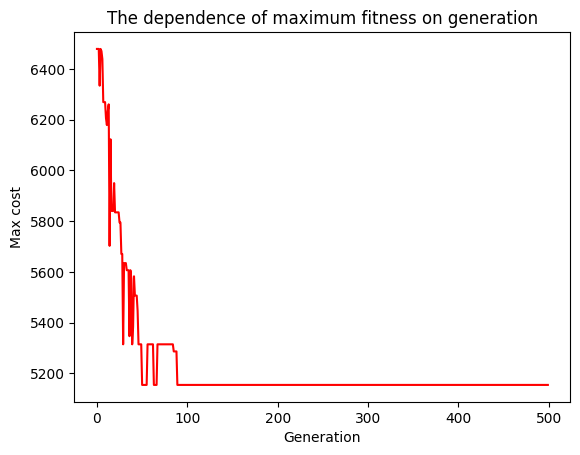

CPU times: total: 4.88 s
Wall time: 14 s


In [7]:
%%time
import random
import matplotlib.pyplot as plt

distance_matrix = [
    [0, 5.48, 7.76, 6.96, 5.82, 2.74, 5.02, 1.94, 3.08, 1.94, 5.36, 5.02, 3.88, 3.54, 4.68, 7.76, 6.62],
    [5.48, 0, 6.84, 3.08, 1.94, 5.02, 7.30, 3.54, 6.96, 7.42, 10.84, 5.94, 4.80, 6.74, 10.16, 8.68, 12.10],
    [7.76, 6.84, 0, 9.92, 8.78, 5.02, 2.74, 8.10, 4.68, 7.42, 4.00, 12.78, 11.64, 11.30, 7.88, 15.52, 7.54],
    [6.96, 3.08, 9.92, 0, 1.14, 6.50, 8.78, 5.02, 8.44, 8.90, 12.32, 5.14, 6.28, 8.22, 11.64, 5.60, 13.58],
    [5.82, 1.94, 8.78, 1.14, 0, 5.36, 7.64, 3.88, 7.30, 7.76, 11.18, 4.00, 5.14, 7.08, 10.50, 6.74, 12.44],
    [2.74, 5.02, 5.02, 6.50, 5.36, 0, 2.28, 3.08, 1.94, 2.40, 5.82, 7.76, 6.62, 6.28, 5.14, 10.50, 7.08],
    [5.02, 7.30, 2.74, 8.78, 7.64, 2.28, 0, 5.36, 1.94, 4.68, 3.54, 10.04, 8.90, 8.56, 5.14, 12.78, 4.80],
    [1.94, 3.54, 8.10, 5.02, 3.88, 3.08, 5.36, 0, 3.42, 3.88, 7.30, 4.68, 3.54, 3.20, 6.62, 7.42, 8.56],
    [3.08, 6.96, 4.68, 8.44, 7.30, 1.94, 1.94, 3.42, 0, 2.74, 3.88, 8.10, 6.96, 6.62, 3.20, 10.84, 5.14],
    [1.94, 7.42, 7.42, 8.90, 7.76, 2.40, 4.68, 3.88, 2.74, 0, 3.42, 5.36, 4.22, 3.88, 2.74, 8.10, 4.68],
    [5.36, 10.84, 4.00, 12.32, 11.18, 5.82, 3.54, 7.30, 3.88, 3.42, 0, 8.78, 7.64, 7.30, 3.88, 11.52, 3.54],
    [5.02, 5.94, 12.78, 5.14, 4.00, 7.76, 10.04, 4.68, 8.10, 5.36, 8.78, 0, 1.14, 3.08, 6.50, 2.74, 8.44],
    [3.88, 4.80, 11.64, 6.28, 5.14, 6.62, 8.90, 3.54, 6.96, 4.22, 7.64, 1.14, 0, 1.94, 5.36, 3.88, 7.30],
    [3.54, 6.74, 11.30, 8.22, 7.08, 6.28, 8.56, 3.20, 6.62, 3.88, 7.30, 3.08, 1.94, 0, 3.42, 4.22, 5.36],
    [4.68, 10.16, 7.88, 11.64, 10.50, 5.14, 5.14, 6.62, 3.20, 2.74, 3.88, 6.50, 5.36, 3.42, 0, 7.64, 1.94],
    [7.76, 8.68, 15.52, 5.60, 6.74, 10.50, 12.78, 7.42, 10.84, 8.10, 11.52, 2.74, 3.88, 4.22, 7.64, 0, 7.98],
    [6.62, 12.10, 7.54, 13.58, 12.44, 7.08, 4.80, 8.56, 5.14, 4.68, 3.54, 8.44, 7.30, 5.36, 1.94, 7.98, 0]
]  # (in km)
flower_market_id = 0
demands = [0, 100, 100, 200, 400, 200, 400, 800, 800, 100, 200, 100, 200, 400, 400, 800, 800]

# Constants for the problem
NUM_COURIERS = 4
NUM_CLIENTS = 16
MAX_LOADS = [2500, 1500, 1500, 500]
SALARY_PER_KM = [100, 80, 80, 60]
# Maximum number of possible cities (including the market)
NUM_CITIES = NUM_CLIENTS + 1

# Maximum distance between cities
MAX_DISTANCE = max(max(row) for row in distance_matrix)

# Genetic algorithm constants
POPULATION_SIZE = 500  # Population size
P_CROSSOVER = 0.6  # Crossover probability
P_MUTATION = 0.1  # Mutation probability of an individual
MAX_GENERATIONS = 500  # Generations size


class FitnessMax():
    def __init__(self):
        self.values = [0]


class Individual():
    def __init__(self):
        self.courier_routes = [[] for _ in range(NUM_COURIERS)]  # List of routes for each courier
        self.fitness = FitnessMax()
        self.used_clients = set()

    def is_valid(self):
        # Checking that the load capacity is not exceeded for each courier
        for i, route in enumerate(self.courier_routes):
            if sum(demands[client] for client in route) > MAX_LOADS[i]:
                return False

        # Checking that all flowers have been distributed
        all_flowers_distributed = set(range(1, NUM_CLIENTS + 1)).issubset(self.used_clients)

        return all_flowers_distributed

    def calculate_load(self, route):
        # Calculating the total load for the given route
        return sum(demands[client] for client in route)

    def random_init(self):
        # Random distribution of clients among couriers
        client_indices = list(range(1, NUM_CLIENTS + 1))
        random.shuffle(client_indices)
        self.courier_routes = [[] for _ in range(NUM_COURIERS)]
        self.used_clients = set()

        for i in range(NUM_CLIENTS):
            client_index = client_indices[i]
            assigned = False
            for j in range(NUM_COURIERS):
                if (sum(demands[client] for client in self.courier_routes[j]) + demands[client_index] <= MAX_LOADS[j] and client_index not in self.used_clients):
                    self.courier_routes[j].append(client_index)
                    self.used_clients.add(client_index)
                    assigned = True
                    break
            if not assigned:
                self.courier_routes[random.randint(0, NUM_COURIERS - 1)].append(client_index)
    # Calculation of total costs
    def evaluate(self):
        total_distances = []  # Список суммарных расстояний для каждого курьера
        for courier_index, route in enumerate(self.courier_routes):
            if len(route) == 0:
                continue
            total_distance = distance_matrix[0][route[0]]  # Расстояние от рынка до первого клиента
            for i in range(len(route) - 1):
                total_distance += distance_matrix[route[i]][route[i + 1]]  # Расстояние между клиентами
            total_distance += distance_matrix[route[-1]][0]  # Расстояние от последнего клиента до рынка
            total_distances.append(total_distance)
        return sum(total_distance * SALARY_PER_KM[i] for i, total_distance in enumerate(total_distances))


def clone(individual):
    new_individual = Individual()
    new_individual.courier_routes = [route[:] for route in individual.courier_routes]
    new_individual.fitness.values = individual.fitness.values
    return new_individual

#Tournament selection
def selTournament(population, p_len):
    selected = []
    for _ in range(p_len):
        tournament = random.sample(population, 3)
        selected.append(max(tournament, key=lambda ind: ind.fitness.values[0]))
    return selected


def fitness(individual):
    return -individual.evaluate(),


def individualCreator():
    ind = Individual()
    ind.random_init()
    return ind


def populationCreator(n=0):
    population = []
    for _ in range(n):
        ind = Individual()
        ind.random_init()
        # Проверяем, что индивидуум является допустимым
        while not ind.is_valid():
            ind.random_init()  # Если не допустим, создаем новый
        population.append(ind)
    return population

# Crossover
def crossover(parent1, parent2):
    child1 = clone(parent1)

    # Child inherits one random route from one parent and another random route from the second parent
    while (True):
        courier_index_1 = random.randint(0, NUM_COURIERS - 1)
        courier_index_2 = random.randint(0, NUM_COURIERS - 1)
        if courier_index_1 != courier_index_2:
            break
    child1.courier_routes[courier_index_1] = parent1.courier_routes[courier_index_1]
    child1.courier_routes[courier_index_2] = parent2.courier_routes[courier_index_2]

    for courier_index in range(NUM_COURIERS):
        if courier_index != courier_index_1 and courier_index != courier_index_2:
            child1.courier_routes[courier_index] = []

    unique_cities_1 = set()
    # remove duplicates from each courier's route in the offspring
    for courier_index in range(NUM_COURIERS):
        cleaned_route = []
        for city in child1.courier_routes[courier_index]:
            if city not in unique_cities_1:
                cleaned_route.append(city)
                unique_cities_1.add(city)
        if courier_index == courier_index_1 or courier_index == courier_index_2:
            child1.courier_routes[courier_index] = cleaned_route

    unused_cities_1 = set(range(1, NUM_CLIENTS + 1)) - unique_cities_1
    # randomly distribution of remaining cities between the two couriers whose routes were not inherited

    n = 0
    m = 100
    # cycle for distributing the remaining cities between the couriers whose routes were not inherited
    # if it's impossible to achieve this distribution considering all constraints within a certain number of iterations, then the crossover is not possible
    while (unused_cities_1 != [] and n < m):
        unused_cities_1 = list(set(range(1, NUM_CLIENTS + 1)) - unique_cities_1)
        random.shuffle(unused_cities_1)
        child1_max = clone(child1)
        for courier_index in range(NUM_COURIERS):
            total_load = sum(demands[city] for city in child1_max.courier_routes[courier_index])
            for city_to_add in list(unused_cities_1):
                if total_load + demands[city_to_add] <= MAX_LOADS[courier_index] and city_to_add in unused_cities_1:
                    child1_max.courier_routes[courier_index].append(city_to_add)
                    unused_cities_1.remove(city_to_add)
                    total_load += demands[city_to_add]
        n += 1
    if n == m:
        return "NO"
    else:
        return child1_max

# Mutation
def mutate(individual):
    # Choose a random courier
    courier_index = random.randint(0, NUM_COURIERS - 1)

    # Choose two random cities
    route = individual.courier_routes[courier_index]
    if len(route) < 2:
        return individual

    city_index1, city_index2 = random.sample(range(len(route)), 2)

    # Swap the cities
    route[city_index1], route[city_index2] = route[city_index2], route[city_index1]

    return individual



def print_best_individual(individual):
    total_flowers = 0
    for i, route in enumerate(individual.courier_routes):
        flowers_in_route = [demands[client] for client in route]  # The flowers carried by the courier on this route
        total_flowers += sum(flowers_in_route)  # The total number of flowers carried by the courier
        route_with_market = [0] + route + [0]  # Adding the flower market at the beginning and end of the route
        print(
            f"Courier route {i + 1}: {route_with_market} (Flowers: {flowers_in_route}, Total capacity: {sum(flowers_in_route)})")
    print(f"Total flowers transported: {total_flowers}")


# Algorithm
population = populationCreator(n=POPULATION_SIZE)
generationCounter = 0

fitnessValues = list(map(fitness, population))
for individual, fitnessValue in zip(population, fitnessValues):
    individual.fitness.values = fitnessValue

maxFitnessValues = []
meanFitnessValues = []

while generationCounter < MAX_GENERATIONS:
    generationCounter += 1
    offspring = selTournament(population, len(population))
    offspring = list(map(clone, offspring))

    for i in range(0, len(offspring), 2):
        parent1 = offspring[i]
        if i + 1 < len(offspring):
            parent2 = offspring[i + 1]
        else:
            parent2 = None
        if parent2 is not None and random.random() < P_CROSSOVER:
            xi = crossover(parent1, parent2)
            xi_1 = crossover(parent1, parent2)
            if xi != "NO" and xi_1 != "NO":
                offspring[i] = xi
                offspring[i + 1] = xi_1

    for mutant in offspring:
        if random.random() < P_MUTATION:
            mutant = mutate(mutant)

    freshFitnessValues = list(map(fitness, offspring))
    for individual, fitnessValue in zip(offspring, freshFitnessValues):
        individual.fitness.values = fitnessValue

    population[:] = offspring

    fitnessValues = [ind.fitness.values[0] for ind in population]

    maxFitness = max(fitnessValues)
    maxFitnessValues.append(-maxFitness)  # Negative value because we are maximizing

print(f"Generation {generationCounter}: Costs = {-maxFitness}")

best_index = fitnessValues.index(max(fitnessValues))
best_individual = population[best_index]
print_best_individual(best_individual)


plt.plot(maxFitnessValues, color='red')
plt.xlabel('Generation')
plt.ylabel('Max cost')
plt.title('The dependence of maximum fitness on generation')
plt.show()
